# Simple linear regression

In [1]:
library(ISLR)
library(MASS)

The Auto dataset from the ISLR package is used in this exercise:<br>

**Tasks**
- Perform a simple linear regression with mpg as the response and horsepower as the predictor.
 - Is there a relationship between the predictor and the response?
 - How strong is the relationship between the predictor and the response?
 - Is the relationship between the predictor and the response positive or negative?
 - What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction
intervals?
- Plot the response and the predictor. Use the abline() function to display the least squares regression line.
- Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

In [2]:
df <- Auto
head(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


Correlation analysis

In [3]:
cor.test(df$horsepower, df$mpg)


	Pearson's product-moment correlation

data:  df$horsepower and df$mpg
t = -24.489, df = 390, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8146631 -0.7361359
sample estimates:
       cor 
-0.7784268 


The p-value indicates that there is significant negative correlation between MGP and horsepower

Regression analysis

In [4]:
df.lm<- lm(mpg~horsepower,data = df)
summary(df.lm)


Call:
lm(formula = mpg ~ horsepower, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


The p-value shows that horsepower is a significant predictor of MPG. For every unit increase in horsepower, there is 0.158 units decrease in MPG

Prediction of MPG values

In [5]:
### Confidence interval
predict(df.lm,data.frame(horsepower=98), interval = "confidence")

,fit,lwr,upr
1,24.46708,23.97308,24.96108


In [6]:
### prediction interval
predict(df.lm,data.frame(horsepower=98), interval = "prediction")

,fit,lwr,upr
1,24.46708,14.8094,34.12476


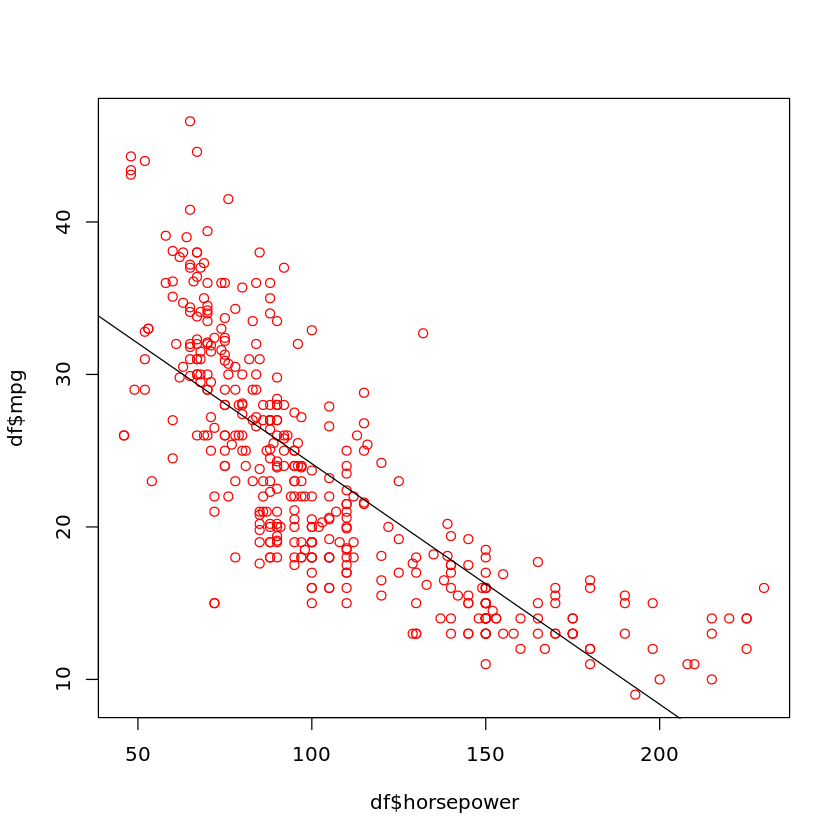

In [8]:
plot(df$horsepower, df$mpg, col="red")
abline(df.lm)

The plot indicates that there is a non-linear relationship (exponential) between MPG and horsepower. Therefore, it is necessary to perform non-linear transformation to get a better model.

**Model diagnostics**: as can be seen in the plots below. The model does not fulfill the assumptions of linear regression as the relationship between the response variable and predictor is non-linear.

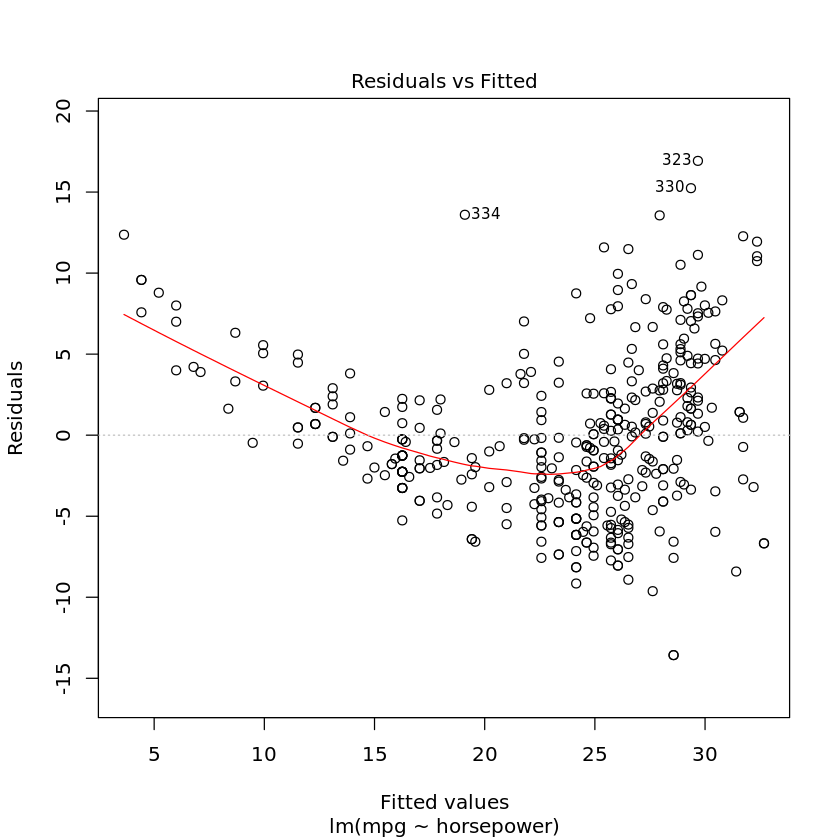

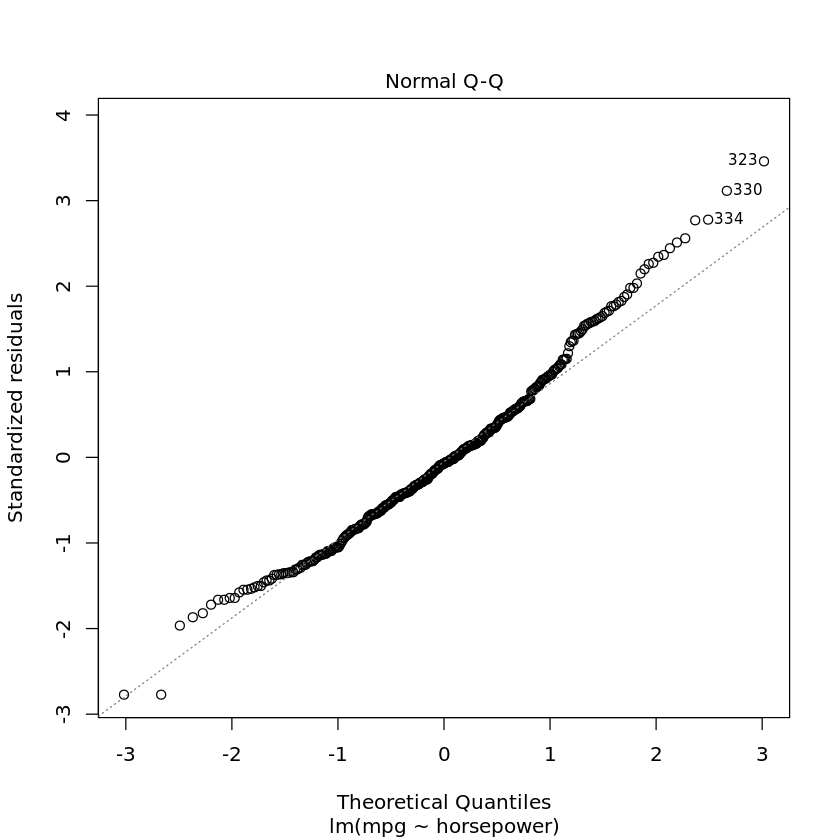

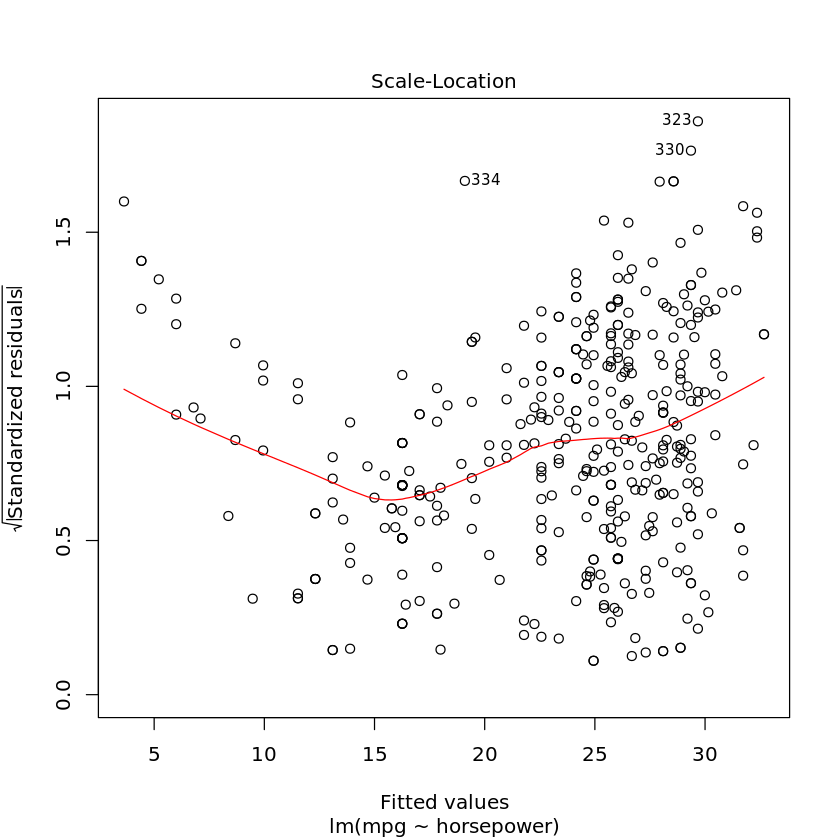

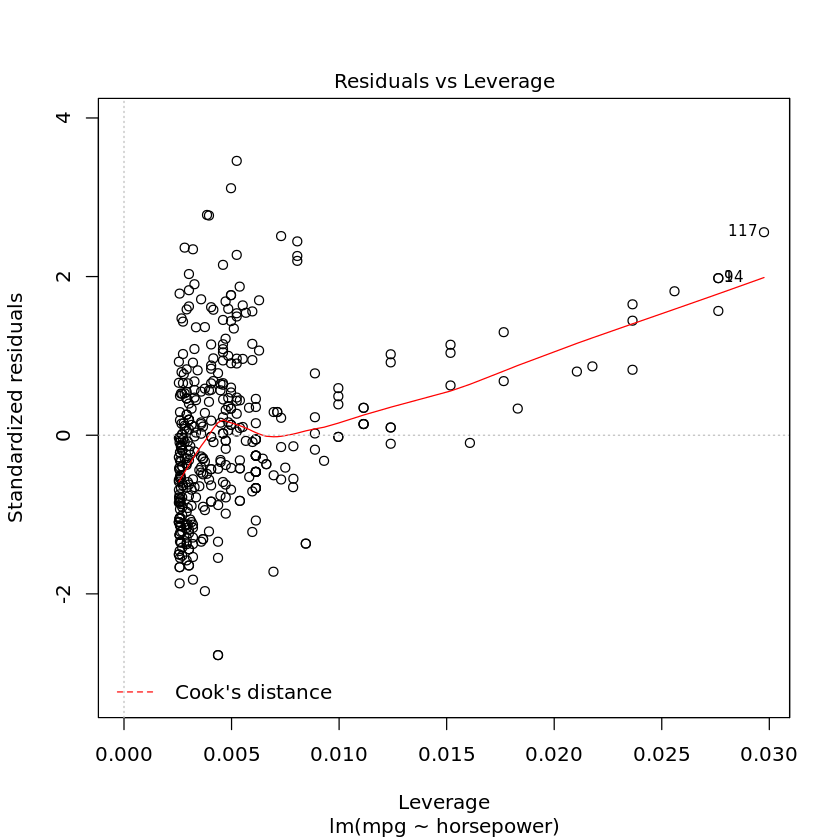

In [9]:
plot(df.lm)

Non-linear transformation of the response variable

In [10]:
df$mpg <- log(df$mpg)

In [11]:
df.lm2<- lm(mpg~horsepower,data = df)
summary(df.lm2)


Call:
lm(formula = mpg ~ horsepower, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62839 -0.12814  0.00914  0.12636  0.59489 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.8644668  0.0277632   139.2   <2e-16 ***
horsepower  -0.0073338  0.0002494   -29.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1898 on 390 degrees of freedom
Multiple R-squared:  0.6892,	Adjusted R-squared:  0.6884 
F-statistic: 864.7 on 1 and 390 DF,  p-value: < 2.2e-16


The new regression model is given as MPG = 3.86 - 0.007(horsepower) + e.<br>
For every unit increase in horsepower, there is 0.007 decrease in MPG

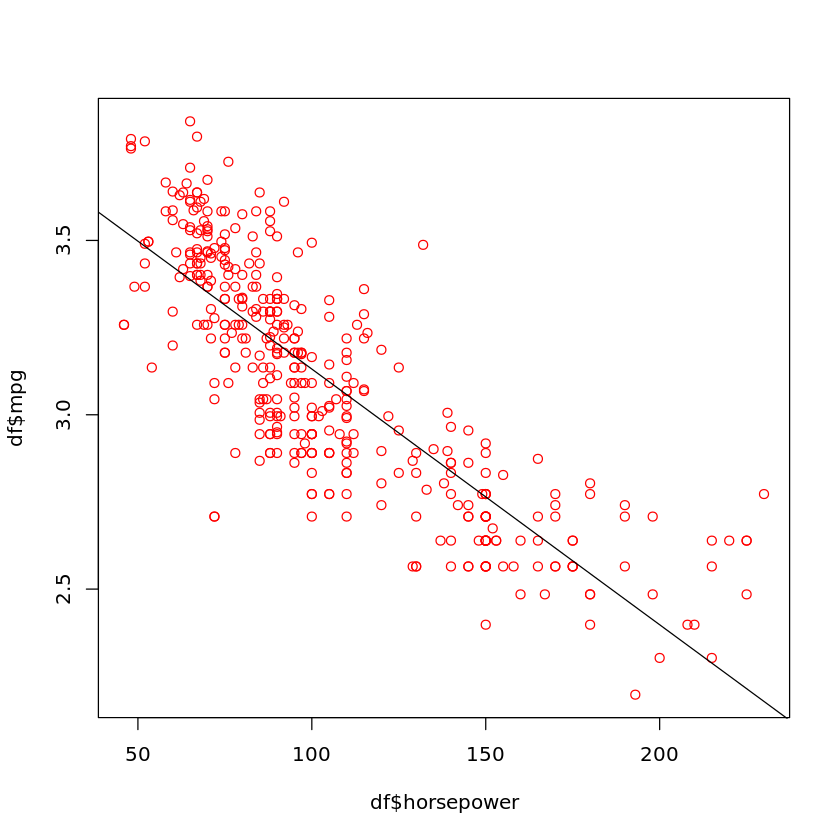

In [12]:
plot(df$horsepower, df$mpg, col="red")
abline(df.lm2)

The plot shows that the non-linear transformation produced a better regression model. This is supported by the higher R-squared value of the log-transformed model compared to the ordinary model.

Prediction of MPG values with the transformed model

In [13]:
### Confidence interval
predict(df.lm2,data.frame(horsepower=98), interval = "confidence")

,fit,lwr,upr
1,3.145758,3.126643,3.164873


In [14]:
### prediction interval
predict(df.lm2,data.frame(horsepower=98), interval = "prediction")

,fit,lwr,upr
1,3.145758,2.772059,3.519457
